In [ ]:
!wget https://www.lamsade.dauphine.fr/~cazenave/project2026.zip
!unzip project2026.zip
!ls -l

--2026-01-19 07:21:31--  https://www.lamsade.dauphine.fr/~cazenave/project2026.zip
Resolving www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)... 193.48.71.250
Connecting to www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)|193.48.71.250|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138578548 (132M) [application/zip]
Saving to: ‘project2026.zip’

project2026.zip     100%[===================>] 132.16M  22.6MB/s    in 6.8s    

2026-01-19 07:21:39 (19.5 MB/s) - ‘project2026.zip’ saved [138578548/138578548]

Archive:  project2026.zip
  inflating: games.data              
  inflating: golois.cpython-312-x86_64-linux-gnu.so  
total 665408
-rw-r--r-- 1 root root 542497580 Oct  7  2022 games.data
-rwxr-xr-x 1 root root    284672 Oct  1 15:09 golois.cpython-312-x86_64-linux-gnu.so
-rw-r--r-- 1 root root 138578548 Oct  1 20:02 project2026.zip
drwxr-xr-x 1 root root      4096 Dec  9 14:42 sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import gc
import matplotlib.pyplot as plt
import pandas as pd
import golois

planes = 31
moves = 361
N = 50000
epochs = 200
batch = 128
filters = 32

input_data = np.random.randint(2, size=(N, 19, 19, planes))
input_data = input_data.astype ('float32')


In [ ]:

policy = np.random.randint(moves, size=(N,))
policy = keras.utils.to_categorical (policy)
policy = policy.astype ('float32')

value = np.random.randint(2, size=(N,))
value = value.astype ('float32')

end = np.random.randint(2, size=(N, 19, 19, 2))
end = end.astype ('float32')

groups = np.zeros((N, 19, 19, 1))
groups = groups.astype ('float32')

print ("Tensorflow version", tf.__version__)
print ("getValidation", flush = True)
golois.getValidation (input_data, policy, value, end)

Tensorflow version 2.19.0
getValidation


In [ ]:
# Define checkpoint directory (persistent on Drive)
import os
import json
checkpoint_dir = "/content/drive/MyDrive/DL_Go_simple_mobileNet/checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_path = os.path.join(checkpoint_dir, "model_last.keras")
progress_file = os.path.join(checkpoint_dir, "progress.json")
metrics_path = "/content/drive/MyDrive/DL_Go_simple_mobileNet/training_metrics.csv"


progress_file = "/content/drive/MyDrive/DL_Go_simple_mobileNet/checkpoints/progress.json"
if os.path.exists(progress_file):
    !cat {progress_file}
else:
    print(f"File not found: {progress_file}")

# Metrics saving
# Initialize metrics storage
if os.path.exists(metrics_path):
    metrics_df = pd.read_csv(metrics_path)
else:
    metrics_df = pd.DataFrame(columns=[
        "epoch",
        "train_policy_loss", "train_value_loss",
        "train_policy_acc", "train_value_mae",
        "val_policy_loss", "val_value_loss",
        "val_policy_acc", "val_value_mae"
    ])

print("\n Metrics of last epochs")
metrics_df

{"last_epoch": 564}
 Metrics of last epochs


,epoch,train_policy_loss,train_value_loss,train_policy_acc,train_value_mae,val_policy_loss,val_value_loss,val_policy_acc,val_value_mae
0,20.0,2.580946,0.119647,0.36142,0.291667,2.588608,0.120241,0.36272,0.292530
1,40.0,2.430826,0.120248,0.38238,0.292613,2.447288,0.120236,0.38132,0.292536
2,60.0,2.345855,0.120531,0.39692,0.293275,2.375718,0.120234,0.39016,0.292528
3,80.0,2.304412,0.119190,0.40058,0.290897,2.313015,0.120271,0.40252,0.292580
4,100.0,2.260103,0.119334,0.40464,0.291047,2.295438,0.120235,0.40400,0.292510
5,120.0,2.248190,0.119669,0.41090,0.292062,2.281306,0.120251,0.40630,0.292551
6,140.0,2.223398,0.120128,0.41270,0.292425,2.250041,0.120240,0.41178,0.292526
7,160.0,2.219904,0.118998,0.41532,0.290503,2.232515,0.120235,0.41410,0.292508
8,180.0,2.208757,0.120302,0.41732,0.293137,2.234504,0.120233,0.41488,0.292517
9,200.0,2.187686,0.119890,0.42228,0.291879,2.200536,0.120238,0.41960,0.292522


In [ ]:
# ----------------------------------------- mobileNet ------------

def inverted_residual_block(x, expansion_factor, out_channels, stride=1, use_residual=True):
    """
    MobileNetV2-style inverted residual block
    - Expands channels with 1x1 conv
    - Depthwise conv in expanded space
    - Projects back down with 1x1 conv
    """
    in_channels = x.shape[-1]
    expanded_channels = in_channels * expansion_factor

    # Expansion phase
    if expansion_factor != 1:
        expand = layers.Conv2D(expanded_channels, 1, padding='same', use_bias=False)(x)
        expand = layers.BatchNormalization()(expand)
        expand = layers.Activation('relu')(expand)
    else:
        expand = x

    # Depthwise convolution
    depthwise = layers.DepthwiseConv2D(3, strides=stride, padding='same', use_bias=False)(expand)
    depthwise = layers.BatchNormalization()(depthwise)
    depthwise = layers.Activation('relu')(depthwise)

    # Projection phase (linear)
    project = layers.Conv2D(out_channels, 1, padding='same', use_bias=False)(depthwise)
    project = layers.BatchNormalization()(project)

    # Residual connection
    if use_residual and stride == 1 and in_channels == out_channels:
        return layers.Add()([x, project])
    return project

def efficient_attention_block(x, channels):
    """
    Lightweight spatial attention mechanism
    Helps the network focus on important board regions
    """
    # Channel attention (squeeze-excitation style)
    squeeze = layers.GlobalAveragePooling2D()(x)
    excite = layers.Dense(channels // 4, activation='relu')(squeeze)
    excite = layers.Dense(channels, activation='sigmoid')(excite)
    excite = layers.Reshape((1, 1, channels))(excite)

    return layers.Multiply()([x, excite])




def build_mobilenet_go_model(filters=24):
    """
    MobileNet-inspired architecture for Go
    Optimized for ~100K parameters

    Key innovations:
    1. Inverted residual blocks (MobileNetV2 style)
    2. Efficient attention mechanism
    3. Shared feature extraction with specialized heads
    4. Optimized channel dimensions
    """

    input_layer = keras.Input(shape=(19, 19, planes), name='board')

    # Initial convolution - establish base features
    x = layers.Conv2D(filters, 3, padding='same', use_bias=False)(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Inverted residual blocks with progressive channel expansion
    # Stage 1: t=2, k=3, c=24, n=2
    x = inverted_residual_block(x, expansion_factor=2, out_channels=filters)
    x = inverted_residual_block(x, expansion_factor=2, out_channels=filters)

    # Stage 2: t=3, k=3, c=32, n=2 (increase channels slightly)
    x = inverted_residual_block(x, expansion_factor=3, out_channels=filters + 8)
    x = inverted_residual_block(x, expansion_factor=3, out_channels=filters + 8)

    # Attention mechanism to focus on critical board positions
    x = efficient_attention_block(x, filters + 8)

    # Stage 3: t=3, k=3, c=32, n=2 (maintain channels)
    x = inverted_residual_block(x, expansion_factor=3, out_channels=filters + 8)
    x = inverted_residual_block(x, expansion_factor=3, out_channels=filters + 8)

    # Final feature refinement
    x = layers.Conv2D(filters + 16, 1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # ========== POLICY HEAD ==========
    # Lightweight policy head using depthwise separable convolutions
    policy = layers.SeparableConv2D(16, 3, padding='same', use_bias=False)(x)
    policy = layers.BatchNormalization()(policy)
    policy = layers.Activation('relu')(policy)

    policy = layers.Conv2D(2, 1, padding='same', use_bias=False)(policy)
    policy = layers.BatchNormalization()(policy)
    policy = layers.Activation('relu')(policy)

    policy = layers.Conv2D(1, 1, padding='same', use_bias=False,
                          kernel_regularizer=regularizers.l2(0.0001))(policy)
    policy = layers.Flatten()(policy)
    policy = layers.Activation('softmax', name='policy')(policy)

    # ========== VALUE HEAD ==========
    # Efficient value head with global pooling
    value = layers.Conv2D(8, 1, padding='same', use_bias=False)(x)
    value = layers.BatchNormalization()(value)
    value = layers.Activation('relu')(value)

    # Global average pooling reduces spatial dimensions efficiently
    value = layers.GlobalAveragePooling2D()(value)

    value = layers.Dense(32, activation='relu',
                        kernel_regularizer=regularizers.l2(0.001))(value)
    value = layers.Dropout(0.3)(value)
    value = layers.Dense(1, activation='sigmoid', name='value',
                        kernel_regularizer=regularizers.l2(0.0001))(value)

    model = keras.Model(inputs=input_layer, outputs=[policy, value])

    return model

# Build and display model
model = build_mobilenet_go_model(filters=24)
model.summary()


# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss={'policy': 'categorical_crossentropy', 'value': 'mse'},
    loss_weights={'policy': 1.0, 'value': 1.0},
    metrics={'policy': 'categorical_accuracy', 'value': 'mae'}
)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ board (InputLayer)  │ (None, 19, 19,    │          0 │ -                 │
│                     │ 31)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 19, 19,    │      6,696 │ board[0][0]       │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 19,    │         96 │ conv2d_61[0][0]   │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_62       │ (None, 19, 19,    │          0 │ batch_normalizat… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 19, 19,    │      1,152 │ activation_62[0]… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 19,    │        192 │ conv2d_62[0][0]   │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_63       │ (None, 19, 19,    │          0 │ batch_normalizat… │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d_22 │ (None, 19, 19,    │        432 │ activation_63[0]… │
│ (DepthwiseConv2D)   │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 19,    │        192 │ depthwise_conv2d… │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_64       │ (None, 19, 19,    │          0 │ batch_normalizat… │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 19, 19,    │      1,152 │ activation_64[0]… │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 19,    │         96 │ conv2d_63[0][0]   │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_18 (Add)        │ (None, 19, 19,    │          0 │ activation_62[0]… │
│                     │ 24)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 19, 19,    │      1,152 │ add_18[0][0]      │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 19,    │        192 │ conv2d_64[0][0]   │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_65       │ (None, 19, 19,    │          0 │ batch_normalizat… │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d_23 │ (None, 19, 19,    │        432 │ activation_65[0]

 Total params: 46,091 (180.04 KB)

 Trainable params: 43,735 (170.84 KB)

 Non-trainable params: 2,356 (9.20 KB)

In [ ]:

# resume if previous checkpoint exists
start_epoch = 0
if os.path.exists(checkpoint_path) and os.path.exists(progress_file):
    print("Loading model from checkpoint...")
    model = keras.models.load_model(checkpoint_path)
    with open(progress_file, "r") as f:
        start_epoch = json.load(f)["last_epoch"]
    print(f"Resuming from epoch {start_epoch + 1}")
else:
    print("Starting training from scratch")

# training
for i in range(start_epoch + 1, start_epoch + epochs + 1):
    print('epoch ' + str (i))
    golois.getBatch (input_data, policy, value, end, groups, i * N)
    # data augmentation
    # todo
    history = model.fit(input_data,
                        [policy,value],
                        epochs=1, batch_size=batch)
    # save JSON progress every epoch (lightweight)
    with open(progress_file, "w") as f:
        json.dump({"last_epoch": i}, f)

    # Get training metrics
    train_metrics = history.history
    train_policy_loss = train_metrics['policy_loss'][-1]
    train_value_loss = train_metrics['value_loss'][-1]
    train_policy_acc = train_metrics['policy_categorical_accuracy'][-1]
    train_value_mae = train_metrics['value_mae'][-1]

    if (i % 5 == 0):
        gc.collect ()
    # Save progress every 20 epochs
    if (i % 20 == 0):
        golois.getValidation (input_data, policy, value, end)
        val = model.evaluate (input_data,
                              [policy, value], verbose = 0, batch_size=batch)

        val_policy_loss = val[1]
        val_value_loss = val[2]
        val_policy_acc = val[3]
        val_value_mae = val[4]
        print("val =", val)
        # save model + progress
        model.save(checkpoint_path)
        print(f"Saved checkpoint at epoch {i}")
        # Append metrics to dataframe
        metrics_df.loc[len(metrics_df)] = [
            i,
            train_policy_loss, train_value_loss,
            train_policy_acc, train_value_mae,
            val_policy_loss, val_value_loss,
            val_policy_acc, val_value_mae
        ]

        # Save metrics file
        metrics_df.to_csv(metrics_path, index=False)

Loading model from checkpoint...
Resuming from epoch 201
epoch 201
391/391 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - loss: 2.3076 - policy_categorical_accuracy: 0.4185 - policy_loss: 2.1858 - value_loss: 0.1208 - value_mae: 0.2938
epoch 202
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 2.3102 - policy_categorical_accuracy: 0.4218 - policy_loss: 2.1880 - value_loss: 0.1214 - value_mae: 0.2946
epoch 203
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 2.3116 - policy_categorical_accuracy: 0.4149 - policy_loss: 2.1911 - value_loss: 0.1196 - value_mae: 0.2914
epoch 204
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 2.3170 - policy_categorical_accuracy: 0.4181 - policy_loss: 2.1951 - value_loss: 0.1210 - value_mae: 0.2940
epoch 205
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 2.3175 - policy_categorical_accuracy: 0.4188 - policy_loss: 2.1969 - value_loss: 0.1197 - value_mae: 0.2916
epoch 206
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 2.3208 - policy_categorical_accuracy:

---

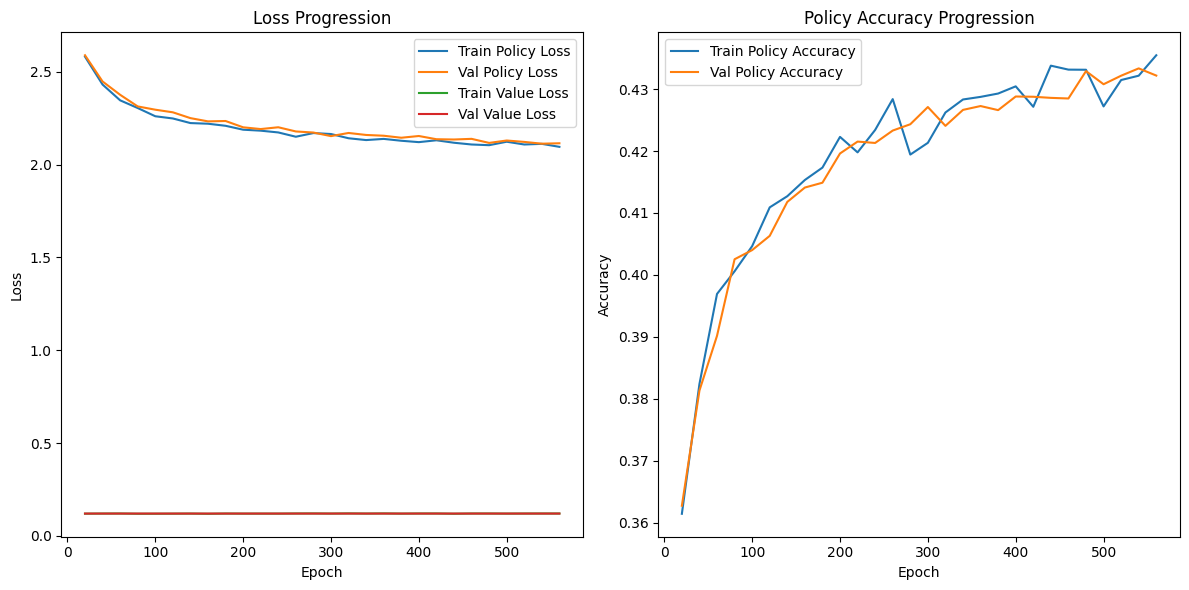

In [ ]:
# Reload metrics
metrics_df = pd.read_csv(metrics_path)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(metrics_df["epoch"], metrics_df["train_policy_loss"], label="Train Policy Loss")
plt.plot(metrics_df["epoch"], metrics_df["val_policy_loss"], label="Val Policy Loss")
plt.plot(metrics_df["epoch"], metrics_df["train_value_loss"], label="Train Value Loss")
plt.plot(metrics_df["epoch"], metrics_df["val_value_loss"], label="Val Value Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Progression")
plt.legend()

plt.subplot(1,2,2)
plt.plot(metrics_df["epoch"], metrics_df["train_policy_acc"], label="Train Policy Accuracy")
plt.plot(metrics_df["epoch"], metrics_df["val_policy_acc"], label="Val Policy Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Policy Accuracy Progression")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import os
from tensorflow import keras
checkpoint_dir = "/content/drive/MyDrive/DL_Go_simple_mobileNet/checkpoints"
model = keras.models.load_model(os.path.join(checkpoint_dir, "model_last.keras"))
model.save('Mellissa_HAFIS-Ilona_LEDROGOFF_Simple-MobileNet.h5')